#**TP 1 - Analyse Discriminante Linéaire**

But : implémenter l'Analyse Discriminante *Linéaire*

Cours : M1 MIAGE apprentissage (Dauphine) - 2023-2024

In [1]:
# libairies utiles pour ce cours

# jeu de données
import sklearn as sk
from sklearn import datasets

# calcul numériques (calculs d'estimateurs)
import numpy as np

#figures et illustrations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

##I Génération de données synthétitiques

On fournit du code pour générer des données synthétiques.

*   Ce jeu de données synthétiques est équilibré (n =100) en 2 dimensions (et se base sur sk.datasets.make_classification)
*   Comme il est en 2D, on peut le représenter le jeu de données (en utilisant plt.scatter) en utilisant des couleurs différentes pour chaque classe.

 1. Lancer plusieurs fois le code de génération de données et affichage. Qu'observez-vous ?
 2. Modifier la génération de données pour rendre les résultats reproductibles.




In [2]:
n = 100
rs = np.random.RandomState(2)
X, y = sk.datasets.make_classification(n_samples=n, n_features=2, n_redundant=0,
                                       n_informative=2, n_repeated=0, n_clusters_per_class=1, random_state=rs)

# lire la documentation pour comprendre les choix de paramètres
# relancer ce bloc plusieurs fois (ainsi que le bloc de visualisation)
# dans la documentation de cette fonction, on peut trouver un moyen de rendre le code reproductible

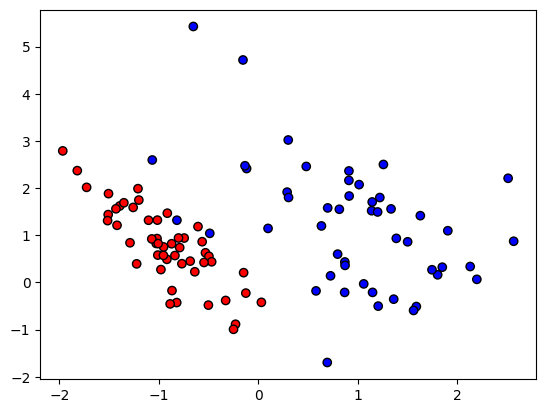

In [3]:
figure = plt.figure()
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright,edgecolors='k')

Observations:

## II Calculs des estimateurs
1. Calculer les estimateurs de (4pts)

> $\hat{\pi}_0$, $\hat{\pi}_1$,

> $\hat{\mu}_0$, $\hat{\mu}_1$,

> $\hat{\Sigma}$, (en calculant éventuellement $\hat{\Sigma}_0$ et $\hat{\Sigma}_1$








In [4]:
# utiliser Numpy pour faire ces estimations

from pickle import TRUE


mu_0 = np.mean(X[y == 0], axis=0)
mu_1 = np.mean(X[y == 1], axis=0)

pi_0 = np.mean(y==0)
pi_1 = np.mean(y==1)

Xtemp = np.concatenate((X[y==0,:]-mu_0, X[y==1,:]-mu_1), axis=0)
# Sigma = (len(X[y==0]) / n) * np.cov(X[y == 0], rowvar=False) + (len(X[y==1]) / n) * np.cov(X[y == 1], rowvar=False)
Sigma = (Xtemp.T)@Xtemp/n

print("mu_0 = ", mu_0)
print("mu_1 = ", mu_1)
print("pi_0 = ", pi_0)
print("pi_1 = ", pi_1)
print("Sigma = ", Sigma)

mu_0 =  [-0.927878    0.77832179]
mu_1 =  [0.93373095 1.21390406]
pi_0 =  0.51
pi_1 =  0.49
Sigma =  [[ 0.41483336 -0.38787128]
 [-0.38787128  1.1721616 ]]


## III Règle de décision

1. Inverser $\hat{\Sigma}$. Dans quel(s) cas a-t-on $\hat{\Sigma}$ non inversible et comment contourner ce problème ?
2. Calculer $w$ et $b$, les paramètres de la frontière de décision
8. prédire la classe du point $x = \left( \begin{array}{c}
0 \\
0 \end{array} \right)$
9. Représenter la frontière de décision (éventuellement à l'aide de plt.pcolormesh comme dans l'exemple)

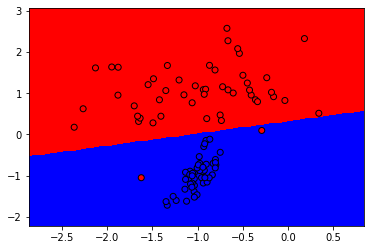






In [5]:
# calcul des paramètres de l'hyperplan séparateur
# inverse de Sigma
iSigma = np.linalg.inv(Sigma)
w = np.dot(iSigma, mu_0-mu_1)
b = -0.5 * np.dot(np.dot(np.transpose(mu_0-mu_1), iSigma), mu_0+mu_1) + np.log(pi_0/pi_1)
print("w = ", w)
print("b = ", b)

x = np.array([0,0])
prediction = 0.5+0.5*np.sign(np.dot(w,x)+b)

if (prediction < 0):
    print("La classe du point x est 1")
else:
    print("La classe du point x est 0")

w =  [-7.00120048 -2.6883212 ]
b =  2.738365663880163
La classe du point x est 0


(112739, 2)
(2,)


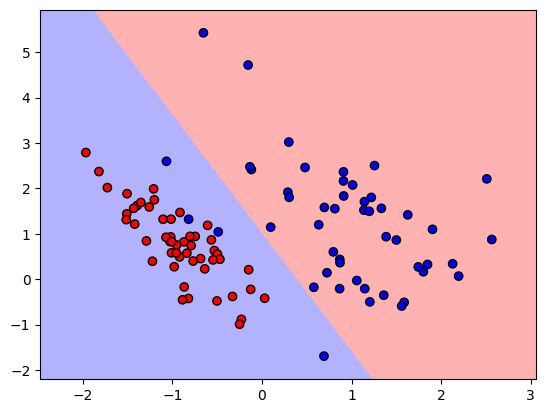

In [11]:
# representation de la frontière de décision
import matplotlib.pyplot as plt

# Generating a grid of points
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02

xlim = np.arange(x_min, x_max, h)
ylim = np.arange(y_min, y_max, h)

xx, yy = np.meshgrid(xlim, ylim)

Xtest = np.concatenate((np.reshape(xx, (np.size(xx), 1)), np.reshape(yy, (np.size(yy), 1))), axis=1)
print(Xtest.shape)
print(w.shape)
ypred = 0.5+0.5*np.sign(np.dot(Xtest,w)+b)
ypred = ypred.reshape(xx.shape)

figure = plt.figure()
plt.pcolormesh(xx, yy, ypred, cmap=cm_bright, shading='auto', alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright,edgecolors='k')

# Computing the values for each point on the grid
# Z = w[0] * xx + w[1] * yy + b

# # Convert the decision function values to class predictions
# Z_predictions = np.where(Z < 0, 0, 1)

# # Use pcolormesh to plot the decision boundary
# plt.pcolormesh(xx, yy, Z_predictions, cmap='BrBG', shading='auto', alpha=0.3)

# # Scatter plot of the data points
# plt.figure(figsize=(10, 7))
# plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='blue', s=50, label='Class 0')
# plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='red', s=50, label='Class 1', marker='^')

# # Plotting the decision boundary
# plt.contour(xx, yy, Z, levels=[0], colors='green')

# plt.title('Decision Boundary of LDA')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.legend()
# plt.grid(True)
# plt.show()



commentaires :

## IV Pour aller plus loin

1. Montrer comment valider la modèle implémenté et discuter les résultats
2. Générer un jeu de données synthétique pour lequel $\Sigma$ n'est pas inversible et résoudre le problème.
3. Valider la généricité de votre code en l'appliquant sur un autre jeu de données (de votre choix) de plus grande dimension. Décrivez ce jeu de données.



In [7]:
# validation du modèle (ex : Leave-One Out Cross Validation)

In [8]:
# données sythétiques avec matrice de covariance non inversible (et tester comment contourner ce problème)

In [9]:
# validation sur des données de plus grande dimensions (données synthétiques ou autres ...) -> regarder les jeux de données dispo dans scikit-learn

observations: